## Preliminary Wrangling

> The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS started gathering details about the causes of flight delays in June 2003. Sypnosis of Data and raw data are made available to the public at the time the Air Travel Consumer Report is released.

> Here, We shall wrangle this data which is downloaded from https://packages.revolutionanalytics.com/datasets/AirOnTimeCSV2012/

> This data has all the flight information of year 2012. We shall Wrangle , Explore the data and communicate our insights to audience with Visualization.


<br/>
<br/>

### Columns in this Dataset:

- __year__ : year in which month occurred.
- __month__ : month for which data was collected.
- __day_of_month__ : Day of month for which data was collected.
- __day_of_week__ : Day of week for which data was collected.
- __dep_time__ : Actual departure time (local, hhmm).
- __crs_dep_time__ : Scheduled departure time (local, hhmm).
- __arr_time__ : Actual arrival time (local, hhmm).
- __crs_arr_time__ : scheduled arrival time (local, hhmm).
- __unique_carrier__ : Unique Carrier Code.
- __fl_num__ : Flight number.
- __tail_num__ : Tail Number.
- __actual_elapsed_time__ : Actual elapsed time of flight(in minutes).
- __crs_elapsed_time__ : Reported elapsed time of flight(in minutes).
- __air_time__ : Flight time(in minutes).
- __arr_delay__ : Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
- __dep_delay__ : Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.	
- __origin__ : Origin Airport.
- __dest__ : Destination Airport.
- __distance__ :Distance between airports(in miles).
- __taxi_in__ : Taxi in time.
- __taxi_out__ : Taxi out time.
- __cancelled__ : Cancelled flight indicator(1=Yes).
- __cancellation_code__ : Specifies The Reason For Cancellation(A=Carrier,B=Weather,C=National Air System,D=Security).
- __diverted__ : Diverted flight indicator(1=Yes).
- __carrier_delay__ : Carrier Delay(in minutes)
- __weather_delay__ : Weather Delay(in minutes)
- __nas_delay__ : National Air System Delay(in minutes)
- __security_delay__ : Security Delay(in minutes)
- __late_aircraft_delay__ : Late Aircraft Delay(in minutes)
      

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Mount Google drive in Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Functions :

In [3]:
def can_or_div(x):
     plt.figure(figsize=(10,8))
     sb.countplot(data=dfcd,x=x,hue='c_or_d')

## Preliminary Data Wrangling:

In [4]:
#Import the Dataset from csv file to a Dataframe
df=pd.read_csv("/content/gdrive/My Drive/datasets/air_2012.csv")
df.head()

,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,tail_num,fl_num,actual_elapsed_time,crs_elapsed_time,air_time,dep_delay,arr_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2012,1,1,7,855.0,900.0,1142.0,1225.0,AA,N325AA,1,347.0,385.0,330.0,-5.0,-43.0,JFK,LAX,2475.0,4.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2012,1,2,1,921.0,900.0,1210.0,1225.0,AA,N319AA,1,349.0,385.0,325.0,21.0,-15.0,JFK,LAX,2475.0,11.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2012,1,3,2,931.0,900.0,1224.0,1225.0,AA,N323AA,1,353.0,385.0,319.0,31.0,-1.0,JFK,LAX,2475.0,22.0,12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2012,1,4,3,904.0,900.0,1151.0,1225.0,AA,N320AA,1,347.0,385.0,309.0,4.0,-34.0,JFK,LAX,2475.0,20.0,18.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2012,1,5,4,858.0,900.0,1142.0,1225.0,AA,N338AA,1,344.0,385.0,306.0,-2.0,-43.0,JFK,LAX,2475.0,22.0,16.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#display the shape of the dataset
df.shape

(6096762, 29)

In [6]:
#display information of columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6096762 entries, 0 to 6096761
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   dep_time             float64
 5   crs_dep_time         float64
 6   arr_time             float64
 7   crs_arr_time         float64
 8   unique_carrier       object 
 9   tail_num             object 
 10  fl_num               int64  
 11  actual_elapsed_time  float64
 12  crs_elapsed_time     float64
 13  air_time             float64
 14  dep_delay            float64
 15  arr_delay            float64
 16  origin               object 
 17  dest                 object 
 18  distance             float64
 19  taxi_in              float64
 20  taxi_out             float64
 21  cancelled            float64
 22  cancellation_code    object 
 23  diverted             float64
 24

In [7]:
#Count the NULL values present in each column in the dataframe
df.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
dep_time                 75723
crs_dep_time                 1
arr_time                 80894
crs_arr_time                 2
unique_carrier               0
tail_num                 14979
fl_num                       0
actual_elapsed_time      91381
crs_elapsed_time             1
air_time                 91381
dep_delay                75723
arr_delay                91381
origin                       0
dest                         0
distance                     0
taxi_in                  80894
taxi_out                 77977
cancelled                    0
cancellation_code      6017900
diverted                     0
carrier_delay          5081604
weather_delay          5081604
nas_delay              5081604
security_delay         5081604
late_aircraft_delay    5081604
dtype: int64

In [8]:
#change the dataypes of fl_num,cancelled and diverted columns to necessary datatypes
df=df.astype({'fl_num':str,'cancelled':int,'diverted':int})

In [9]:
#change the values of dep_time,arr_time,taxi_out,dep_delay when the flight is cancelled to null
df.loc[df.cancelled==1,'dep_time']=np.nan
df.loc[df.cancelled==1,'arr_time']=np.nan
df.loc[df.cancelled==1,'taxi_out']=np.nan
df.loc[df.cancelled==1,'dep_delay']=np.nan

In [10]:
#count the null values in each column when flights get diverted
df[df.diverted==1].isnull().sum()

year                       0
month                      0
day_of_month               0
day_of_week                0
dep_time                   0
crs_dep_time               0
arr_time                2032
crs_arr_time               0
unique_carrier             0
tail_num                   0
fl_num                     0
actual_elapsed_time    12519
crs_elapsed_time           0
air_time               12519
dep_delay                  0
arr_delay              12519
origin                     0
dest                       0
distance                   0
taxi_in                 2032
taxi_out                   0
cancelled                  0
cancellation_code      12519
diverted                   0
carrier_delay          12519
weather_delay          12519
nas_delay              12519
security_delay         12519
late_aircraft_delay    12519
dtype: int64

In [11]:
#change the values of dep_time,arr_time,taxi_out,dep_delay when the flight is diverted to null
df.loc[df.diverted==1,'dep_time']=np.nan
df.loc[df.diverted==1,'arr_time']=np.nan
df.loc[df.diverted==1,'dep_delay']=np.nan
df.loc[df.diverted==1,'taxi_in']=np.nan
df.loc[df.diverted==1,'taxi_out']=np.nan

In [12]:
#Remove those datapoints where actual departure or arrival time is null
df=df[(df.crs_dep_time.notnull()) & (df.crs_arr_time.notnull())]

In [13]:
#Count the null values in each column of the dataframe
df.isnull().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
dep_time                 91381
crs_dep_time                 0
arr_time                 91381
crs_arr_time                 0
unique_carrier               0
tail_num                 14979
fl_num                       0
actual_elapsed_time      91381
crs_elapsed_time             0
air_time                 91381
dep_delay                91381
arr_delay                91381
origin                       0
dest                         0
distance                     0
taxi_in                  91381
taxi_out                 91381
cancelled                    0
cancellation_code      6017898
diverted                     0
carrier_delay          5081604
weather_delay          5081604
nas_delay              5081604
security_delay         5081604
late_aircraft_delay    5081604
dtype: int64

In [14]:
# Import airports lookup table from csv file to a Dataframe
airports=pd.read_csv('/content/gdrive/My Drive/datasets/airports.csv')
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [15]:
#Drop unnessessary columns
airports=airports[['iata','airport','city']]
airports.head()

,iata,airport,city
0,00M,Thigpen,Bay Springs
1,00R,Livingston Municipal,Livingston
2,00V,Meadow Lake,Colorado Springs
3,01G,Perry-Warsaw,Perry
4,01J,Hilliard Airpark,Hilliard


In [16]:
# Import carriers lookup table from csv file to a Dataframe
carr=pd.read_csv('/content/gdrive/My Drive/datasets/carriers.csv')

In [17]:
#inner join carriers Dataframe and main dataset on carrier code present in two tables
#Drop the repeated Code column
#rename the new columns as per our need
df=pd.merge(df,carr,left_on='unique_carrier',right_on='Code',how='inner')
df.drop(columns=['Code'],inplace=True)
df.rename(columns={'Description': 'carrier_name'},inplace=True)

In [18]:
#inner join airports Dataframe and main dataset on origin airport's iata code present in two tables
#Drop the repeated iata column
#rename the new columns to org_airport and org_city to signify origin airport name and city 
df=pd.merge(df,airports,left_on='origin',right_on='iata')
df.drop(columns=['iata'],inplace=True)
df.rename(columns={'airport':'org_airport','city':'org_city'},inplace=True)

In [19]:
#inner join airports Dataframe and main dataset on destination airport's iata code present in two tables
#Drop the repeated iata column
#rename the new columns to dest_airport and dest_city to signify destination airport name and city 
df=pd.merge(df,airports,left_on='dest',right_on='iata')
df.drop(columns=['iata'],inplace=True)
df.rename(columns={'airport':'dest_airport','city':'dest_city'},inplace=True)

In [20]:
#replace a value in carrier name as it is very long and that extra part is irrelevant for our analysis
mask=df.carrier_name=='US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'
df.loc[mask,'carrier_name']='US Airways Inc.'

In [21]:
#replace all the cancellation codes to their respective reasons for cancellation which are carrier,weather,NAS and Security 
df.loc[df.cancellation_code=='A','cancellation_code']='Carrier'
df.loc[df.cancellation_code=='B','cancellation_code']='Weather'
df.loc[df.cancellation_code=='C','cancellation_code']='National Air System'
df.loc[df.cancellation_code=='D','cancellation_code']='Security'
df.loc[df.cancellation_code=='N','cancellation_code']=np.NaN

In [22]:
#Display the info of the main dataframe after merging all the required dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6082854 entries, 0 to 6082853
Data columns (total 34 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   dep_time             float64
 5   crs_dep_time         float64
 6   arr_time             float64
 7   crs_arr_time         float64
 8   unique_carrier       object 
 9   tail_num             object 
 10  fl_num               object 
 11  actual_elapsed_time  float64
 12  crs_elapsed_time     float64
 13  air_time             float64
 14  dep_delay            float64
 15  arr_delay            float64
 16  origin               object 
 17  dest                 object 
 18  distance             float64
 19  taxi_in              float64
 20  taxi_out             float64
 21  cancelled            int64  
 22  cancellation_code    object 
 23  diverted             int64  
 24

### What is the structure of your dataset?

> There are 6082854 flight records in the datset with 34 features. All the time differences or delays are in minutes. I extracted The origin and destination airport names from the lookup datasets I have downloaded from http://stat-computing.org/dataexpo/2009/supplemental-data.html. The carrier names have been extracted from the lookup data sets I downloaded from the same website that I have mentioned before.


### What is/are the main feature(s) of interest in your dataset?

> I am very much intrested in finding which airports have most delayed flights? and rank them accordingly.which carrier flights mostly get delayed? etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I will make used of almost all the features in this analysis. __arr_delay,carrier_name,org_name,etc.__ might help me in finding most of the answers I need.

## Univariate Exploration

> In this section, We shall investigate distributions of individual variables and Note if we find anything peculiar.

> Lets see the 
top 5 airports ranked by no. of flights records present in our dataset

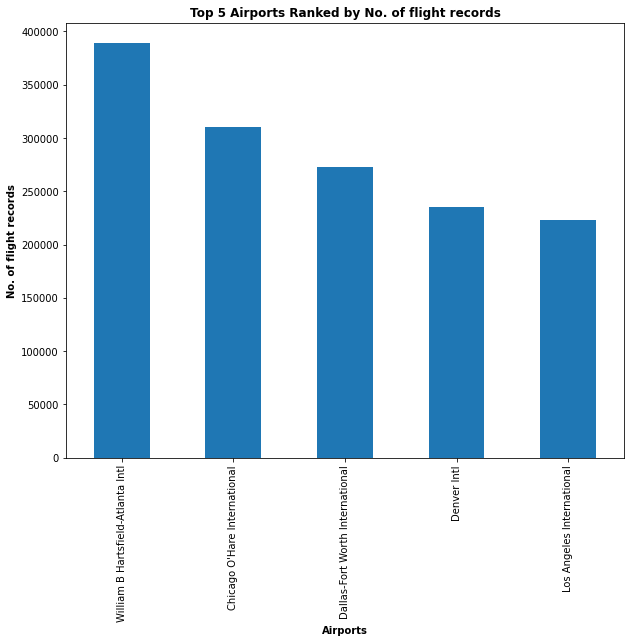

In [23]:
#Plot a Bar chart of top 5 airports ranked by no. of flight records.
plt.figure(figsize=(10,8))
topairports=df.org_airport.value_counts()[:5]
topairports.plot.bar(x=topairports.index);
plt.xticks(rotation=90);
plt.ylabel('No. of flight records',fontweight="bold")
plt.xlabel('Airports',fontweight="bold")
plt.title('Top 5 Airports Ranked by No. of flight records',fontweight="bold");

We can infer that **"William B Hartsfield-Atlanta Intl"** has most flight records approx 400000 stand in 1st position and **"Los Angeles International"** stand in 5th pos with arounf 200000 flight records. These Airports are top 5 airports when Ranked by no. of flight records.

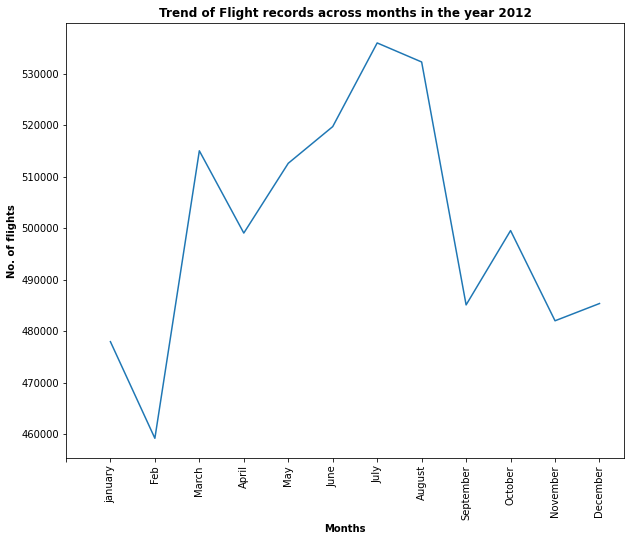

In [24]:
# Plot a line chart of no. of flights across months in the year
plt.figure(figsize=(10,8))
dfc=df[df.cancelled==0]
mon=dfc.month.value_counts()
mon.sort_index(inplace=True)
plt.plot(mon.index,mon.values)
plt.xlabel("Months",fontweight="bold");
plt.ylabel('No. of flights',fontweight="bold")
plt.title("Trend of Flight records across months in the year 2012",fontweight="bold")
plt.xticks(np.arange(13),('','january','Feb','March','April','May','June','July','August','September','October','November','December'),rotation=90);

We can see that the no. of flight records are more in the month **July**. We can also observe there is **sharp decrease** in flights from the month **August to September** and there is **sharp increase** in the no. of flights records from the month **February  to March.**

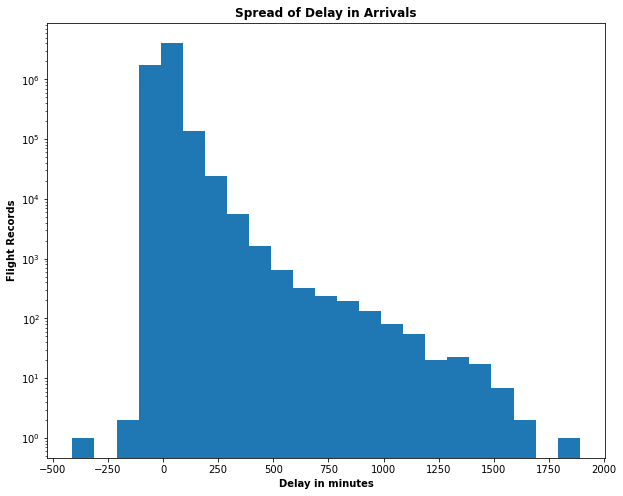

In [25]:
#plot histogram of arr_delay
#log transform y-axis 
plt.figure(figsize=(10,8))
bin_edges = np.arange(int(df['arr_delay'].min()), int(df['arr_delay'].max()+100),100)
plt.hist(data=df,x='arr_delay',bins=bin_edges);
plt.xticks(np.arange(-500,2000+250,250));
plt.yscale('log');
plt.xlabel("Delay in minutes",fontweight="bold");
plt.ylabel("Flight Records",fontweight="bold")
plt.title("Spread of Delay in Arrivals",fontweight="bold");

In [26]:
#Print the max and min arrival delay.
print(df.arr_delay.max(),df.arr_delay.min())

1823.0 -411.0


It is a **Right Skewed** distribution, It signifies that most of the flights are mostly on time with mode around 0. The Y-axis is on **log** scale. There are some flights which arrived before actual arrival time less compared to flights which are delayed. There is one flight which is arrived **1823 min(30 hrs)** late compared to actual arrival time which is the most delayed flight in our dataset.There is one more flight which arrived **411 min(6 hrs)** early than the actual arrival time. In this graph **negative arrival** delay signifies the flight arrived **early.**




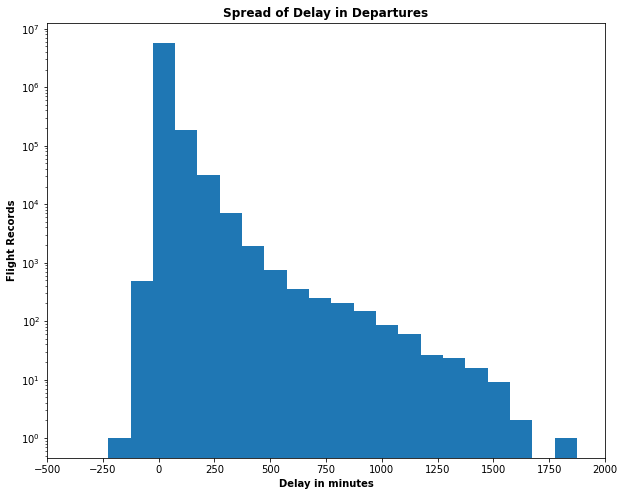

In [27]:
#plot histogram of dep_delay
#log transform y-axis 
plt.figure(figsize=(10,8))
bin_edges = np.arange(int(df['dep_delay'].min()), int(df['dep_delay'].max()+100),100)
plt.hist(data=df,x='dep_delay',bins=bin_edges);
plt.xticks(np.arange(-500,2000+250,250));
plt.yscale('log');
plt.xlabel("Delay in minutes",fontweight="bold");
plt.ylabel("Flight Records",fontweight="bold")
plt.title("Spread of Delay in Departures",fontweight="bold");

In [28]:
#print max and min depature delay in our dataset
print(df.dep_delay.min(),df.dep_delay.max())

-226.0 1831.0


It is a **Right Skewed** distribution, It signifies that most of the flights are mostly on time with mode around 0. The Y-axis is on **log** scale. There are some flights which departed before actual departure time less compared to flights which are delayed. There is one flight which is departed **1831 min(30.5 hrs)** late compared to actual departure time which is the most delayed flight in our dataset.There is one more flight which departed **226 min(3.7 hrs)** early than the actual departure time. In this graph **negative depature** delay signifies the flight  departed **early.**

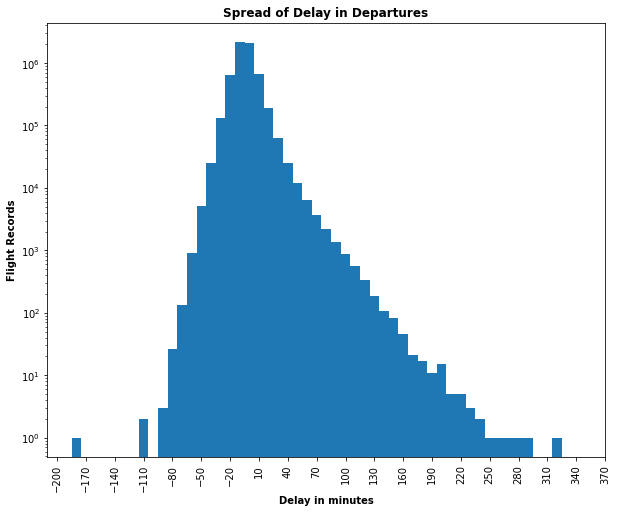

In [29]:
#Plot a histogram of difference between arrival delay and dep delay
#log transform the y-axis
plt.figure(figsize=(10,8))
#create a new column in our dataframe to store the difference between arrival delay and dep delay
df['mid_air']=df['arr_delay']-df['dep_delay']
bin_edges = np.arange(int(df['mid_air'].min()), int(df['mid_air'].max()+10),10)
plt.hist(data=df,x='mid_air',bins=bin_edges);
plt.yscale('log')
plt.xticks(np.arange(-200,350+30,30),rotation=90);
plt.xlabel("Delay in minutes",fontweight="bold");
plt.ylabel("Flight Records",fontweight="bold")
plt.title("Spread of Delay in Departures",fontweight="bold");

It almost looks like a normal distribution , But if we have to decide the type of distribution , it is a right skewed Distribution. It signifies that Delay increase of decrease during the mid flight. If the delay is decreased during the mid flight then its negative orelse it has positive value if delay is increased midflight

In [30]:
#count the flights which speedup , increase more delay or maintain same delay in mid air.
rows=df[df.mid_air.notnull()].shape[0]
nochange=df[df['mid_air']==0].shape[0]
speedup_no=df[(df['mid_air']<0) & (df['arr_delay']>0)].shape[0]
moredelay=df[df['mid_air']>0].shape[0]
speedup_crct=df[(df['mid_air']<0) & (df['arr_delay']==0)].shape[0]
speedup_bfr=df[(df['mid_air']<0) & (df['arr_delay']<0)].shape[0]
speedup=df[df['mid_air']<0].shape[0]


In [31]:
#print percentage of flights which speedup and reach early or on time or still get delayed
print("Percentage of flights which speed up but still get delayed: {0:.2f}%".format((speedup_no/speedup)*100))
print("Percentage of flights which speed up to reach correct time: {0:.2f}%".format((speedup_crct/speedup)*100))
print("Percentage of flights which speed up and reach before the actual arrival time is : {0:.2f}%".format((speedup_bfr/speedup)*100))

Percentage of flights which speed up but still get delayed: 20.71%
Percentage of flights which speed up to reach correct time: 1.29%
Percentage of flights which speed up and reach before the actual arrival time is : 78.01%


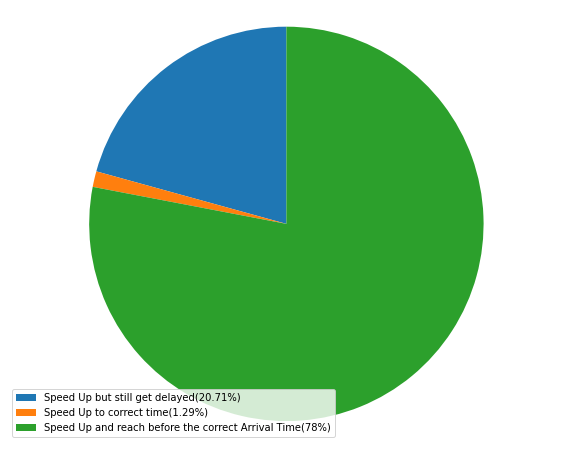

In [32]:
#make a pie chart representing the percentage of values which we found above
data=[speedup_no,speedup_crct,speedup_bfr]
speeduplist=['Speed Up but still get delayed(20.71%)','Speed Up to correct time(1.29%)','Speed Up and reach before the correct Arrival Time(78%)']
plt.figure(figsize =(10, 8)) 
patches, texts =plt.pie(data,startangle=90);
plt.legend(patches, speeduplist, loc="best")
plt.axis('equal');

**78%** of the flights speedup during the midflight and **reach early** than the actual arrival time which I found very intresting. **20.71%** flights speedup during the flight and **still get delayed**.There are** 1.29%** flights which  speedup and reach **on actual arrival time**.

In [33]:
#calculate percentages of flights which speedup or increase delay or maintain same delay
print("Percentage of flights which speedup during the flight: {0:.2f}%".format((speedup/rows)*100))
print("Percentage of flights which further increase delay during the flight: {0:.2f}%".format((moredelay/rows)*100))
print("Percentage of flights maintain the same delay during the flight : {0:.2f}%".format((nochange/rows)*100))

Percentage of flights which speedup during the flight: 69.89%
Percentage of flights which further increase delay during the flight: 26.76%
Percentage of flights maintain the same delay during the flight : 3.35%


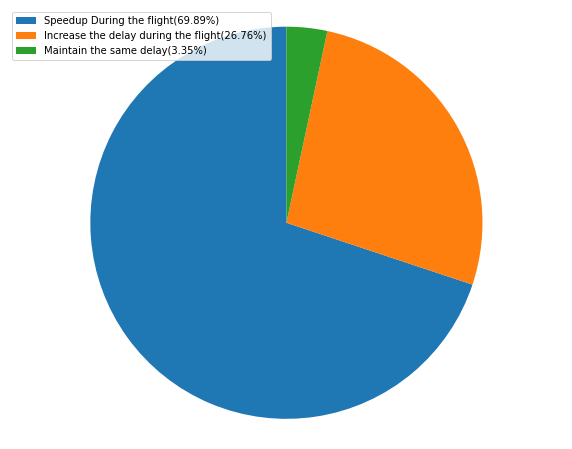

In [34]:
#Make a pie chart representing the percentages which we found above in our data.
data=[speedup,moredelay,nochange]
midairlist=['Speedup During the flight(69.89%)','Increase the delay during the flight(26.76%)','Maintain the same delay(3.35%)']
plt.figure(figsize =(10, 8)) 
patches, texts =plt.pie(data,startangle=90);
plt.legend(patches, midairlist, loc="best")
plt.axis('equal');

**69%** flights speed up during the mid flight. **26.76%** flights get more delayed using the mid flight. **3.35%** flights neither increase nor decrease the delay using the mid flight.

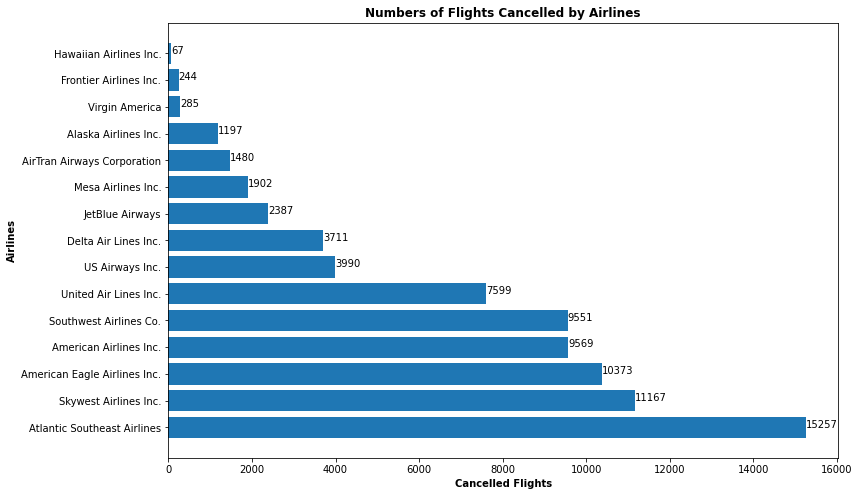

In [35]:
#plot a horizantal bar graph representing no. of flight operated by each carrier
cancelled_carriers=df[df.cancelled==1].carrier_name.value_counts()
plt.figure(figsize=(12,8))
plt.barh(cancelled_carriers.index,cancelled_carriers.values);
plt.xlabel('Cancelled Flights',fontweight="bold")
plt.ylabel('Airlines',fontweight="bold")
plt.title('Numbers of Flights Cancelled by Airlines',fontweight="bold")
for index, value in enumerate(cancelled_carriers.values):
     plt.text(value, index, str(value))

**Atlantic Southeast Airlines** have **highest** no. of cancelled flights**(15257)** and **Hawaiin Airlines** have **least** cancelled Flights**(67)**. **The American Airlines Inc** and **Southwest Airlines Co.**  have the almost same no. of cancelled flights.  


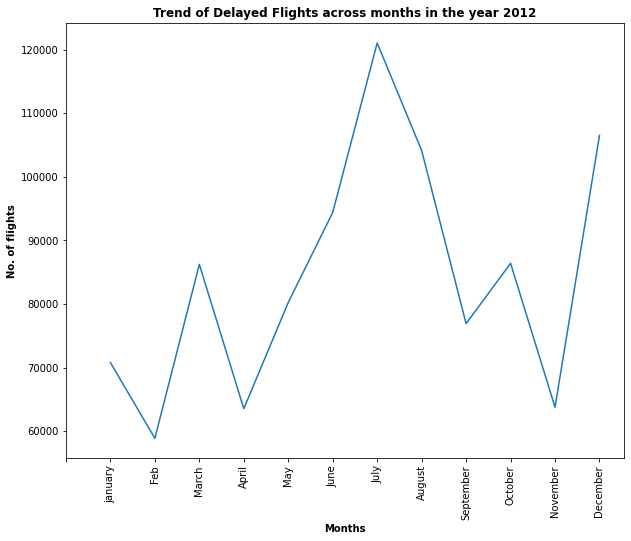

In [36]:
# plot a line of the no. of delayed flights across months
plt.figure(figsize=(10,8))
dfdelay=dfc[dfc['arr_delay']>=15]
mon=dfdelay.month.value_counts()
mon.sort_index(inplace=True)
plt.plot(mon.index,mon.values)
plt.xlabel("Months",fontweight="bold");
plt.ylabel('No. of flights',fontweight="bold")
plt.title("Trend of Delayed Flights across months in the year 2012",fontweight="bold")
plt.xticks(np.arange(13),('','january','Feb','March','April','May','June','July','August','September','October','November','December'),rotation=90);

Most of the Delayed flights are in month of **July** . The least no. of delayed flights are in the month of **February**. **April** and **Novembers** also have very less no. of delayed flights compared to other months.

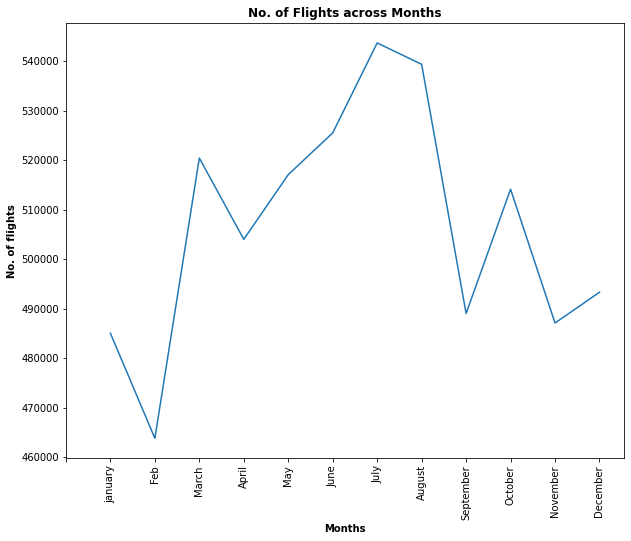

In [37]:
#plot a line char of no. of flights across months
plt.figure(figsize=(10,8))
mon=df.month.value_counts()
mon.sort_index(inplace=True)
plt.plot(mon.index,mon.values)
plt.xlabel("Months",fontweight="bold");
plt.ylabel('No. of flights',fontweight="bold")
plt.title("No. of Flights across Months",fontweight="bold")
plt.xticks(np.arange(13),('','january','Feb','March','April','May','June','July','August','September','October','November','December'),rotation=90);

>  The no. flights operating is high in the month of __July__ and low in the month of __February__.There is a sharp rise in no. of flights operating from February to March and a sharp fall from August to September


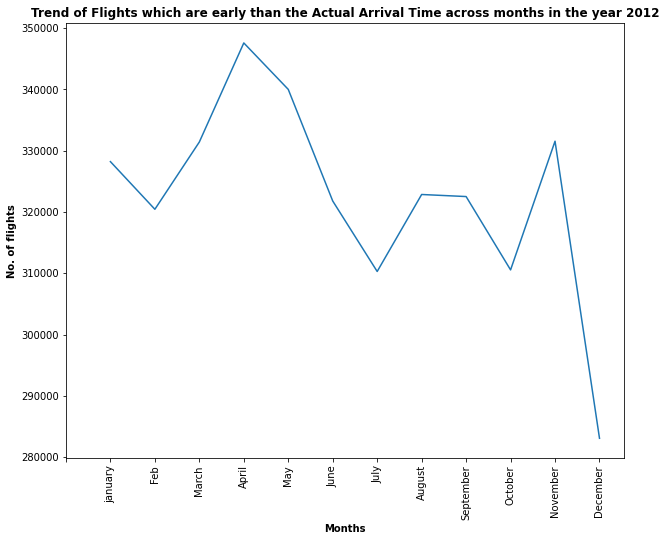

In [38]:
#Plot a line chart of no. of flights which reach early across months
plt.figure(figsize=(10,8))
dfdelay=dfc[dfc['arr_delay']<=0]
mon=dfdelay.month.value_counts()
mon.sort_index(inplace=True)
plt.plot(mon.index,mon.values)
plt.xlabel("Months",fontweight="bold");
plt.ylabel('No. of flights',fontweight="bold")
plt.title("Trend of Flights which are early than the Actual Arrival Time across months in the year 2012",fontweight="bold")
plt.xticks(np.arange(13),('','january','Feb','March','April','May','June','July','August','September','October','November','December'),rotation=90);

**April** has highest no. of flights which are early than the actual arrival time. **December** has least no. of flighs which are early than the actual arrival time.

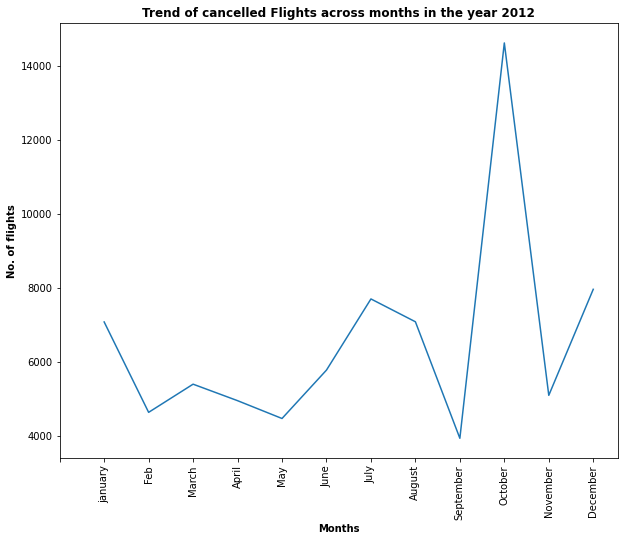

In [39]:
#Plot a line chart of no. of cancelled flights across months
plt.figure(figsize=(10,8))
dfcancelled=df[df['cancelled']==1]
mon=dfcancelled.month.value_counts()
mon.sort_index(inplace=True)
plt.plot(mon.index,mon.values)
plt.xlabel("Months",fontweight="bold");
plt.ylabel('No. of flights',fontweight="bold")
plt.title("Trend of cancelled Flights across months in the year 2012",fontweight="bold")
plt.xticks(np.arange(13),('','january','Feb','March','April','May','June','July','August','September','October','November','December'),rotation=90);

**October** has highest no. of cancelled flights and **September** has the least no. of cancelled flights.

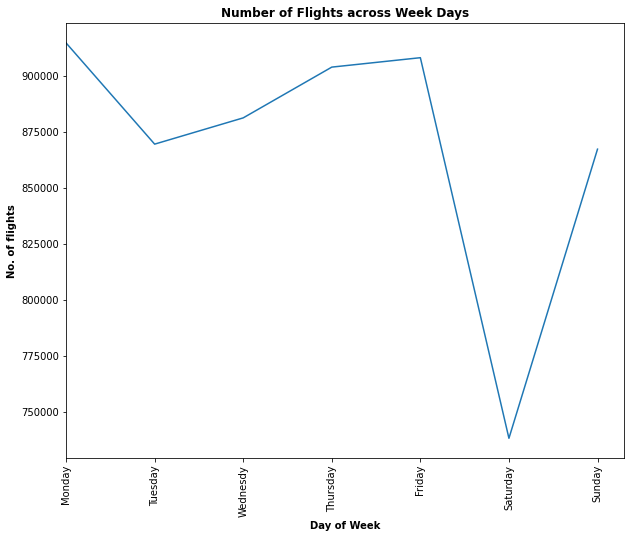

In [40]:
#plot line chart of no. of flights across weekdays
plt.figure(figsize=(10,8))
dfw=df.day_of_week.value_counts()
dfw.sort_index(inplace=True)
plt.plot(dfw.index,dfw.values)
plt.xlabel("Day of Week",fontweight="bold");
plt.ylabel('No. of flights',fontweight="bold")
plt.title("Number of Flights across Week Days",fontweight="bold")
plt.xticks(np.arange(8),("",'Monday','Tuesday','Wednesdy','Thursday','Friday','Saturday','Sunday'),rotation=90);
plt.xlim(left=1);

> The no. flights operating is high on __Monday__ and low on __Saturday__ .There is a __sharp fall__ in the no. of flights operating from Friday to Saturday.

> Less flights operate in weekends(Saturday and Sunday) compared to weekdays(Monday-Friday)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I found that arrival delay and depature delay are right skewed with mode around 0. while calculating how many flights speed up and reach early than the actual arrival time I found that approx 78% of flights do that!.Thats really intresting!! that most of the flights not only cover their departure delay but also reach early than the actual arrival time. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  There were no unusual distributions of the variables.When I plot the trend of the cancelled flights and no. of flight records I found that though the no. of flight records are high in July , the no. of cancelled flights is high in the month of October rather than July!.

> The no. of flights which reach early than the actual arrival time is high in the month of April.

## Bivariate Exploration

> Lets start of by exploring the relation ship between arrival and departure delay with the months by using box plots


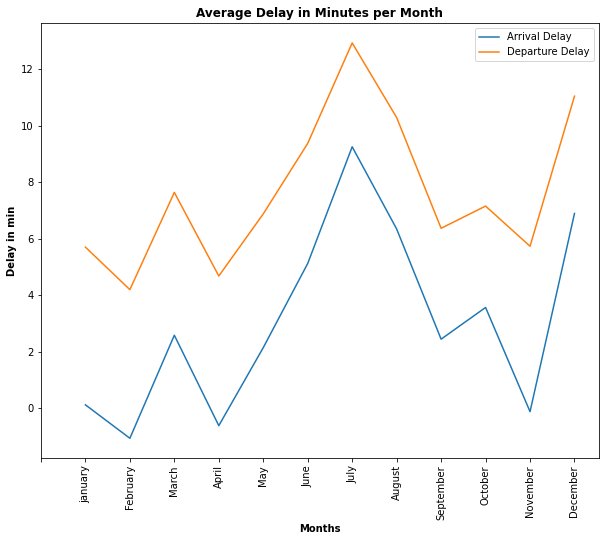

In [41]:
#Group the dataframe by month and calculate the average arrival and dep delay for each month and plot a line chart for both to see their trend. 
dfm=df.groupby(['month'])
arrm=dfm.arr_delay.mean();
depm=dfm.dep_delay.mean();
plt.figure(figsize=(10,8))
plt.plot(arrm.index,arrm,label="Arrival Delay");
plt.plot(depm.index,depm,label="Departure Delay");
plt.xlabel('Months',fontweight="bold")
plt.ylabel('Delay in min',fontweight="bold")
plt.title("Average Delay in Minutes per Month",fontweight="bold")
plt.xticks(np.arange(13),('','january','February','March','April','May','June','July','August','September','October','November','December'),rotation=90);
plt.legend();

> The Average Arrival Delay is least in the month of February and also very low in April and November. Average Arrival Delay is negative in these months which is great.

> Average Departure Delay is Always greater than average arrival delay through out the year!. Average and arrival delay is high in July it may be beacause that no. of flights are high in that month which we found out in our univariate exploration.



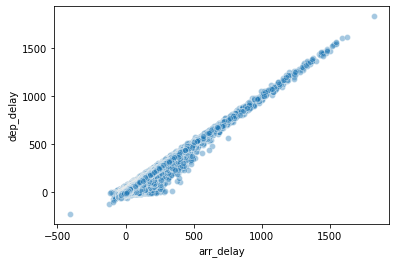

In [42]:
# plot all the points of dep delay and arr delay to see the relation between two.
sb.scatterplot(x='arr_delay',y='dep_delay',data=df,y_jitter=0.2,alpha=0.4)

There is Very High correlation between Depature Delay and Arrival Delay which we can infer from the plot.

In [43]:
# make a single column to represent whether the flight is cancelled or diverted
dfcd=df[(df.cancelled==1) | (df.diverted==1)]
dfcd=dfcd[['month','day_of_week','cancelled','diverted','cancellation_code','carrier_name']]
dfcd.loc[df.cancelled==1,'c_or_d']='cancelled'
dfcd.loc[df.diverted==1,'c_or_d']='diverted'

In [44]:
#display the count of cancelled or diverted flights each month
dfcd.groupby(['month']).c_or_d.value_counts()

month  c_or_d   
1      cancelled     7084
       diverted       999
2      cancelled     4645
       diverted       666
3      cancelled     5405
       diverted      1018
4      cancelled     4960
       diverted       826
5      cancelled     4479
       diverted      1246
6      cancelled     5785
       diverted      1409
7      cancelled     7705
       diverted      1643
8      cancelled     7089
       diverted      1238
9      cancelled     3945
       diverted       811
10     cancelled    14613
       diverted       796
11     cancelled     5104
       diverted       699
12     cancelled     7965
       diverted      1124
Name: c_or_d, dtype: int64

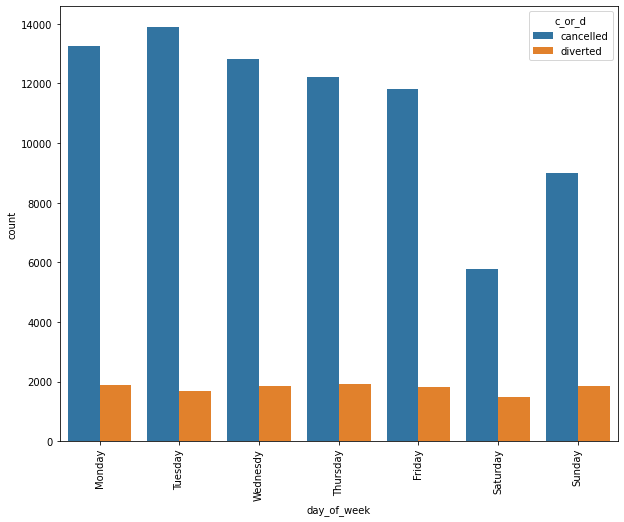

In [45]:
#plot a clustered bar char to compare cancelled and diverted flights each day of week in the whole year
can_or_div('day_of_week')
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesdy','Thursday','Friday','Saturday','Sunday'),rotation=90);

Tuesday is highest of all weekdays when ranked by cancelled Flights. We can say that there may be high probability of cancellation on tuesdays. Saturday have very less cancelled flights compared to other week days.

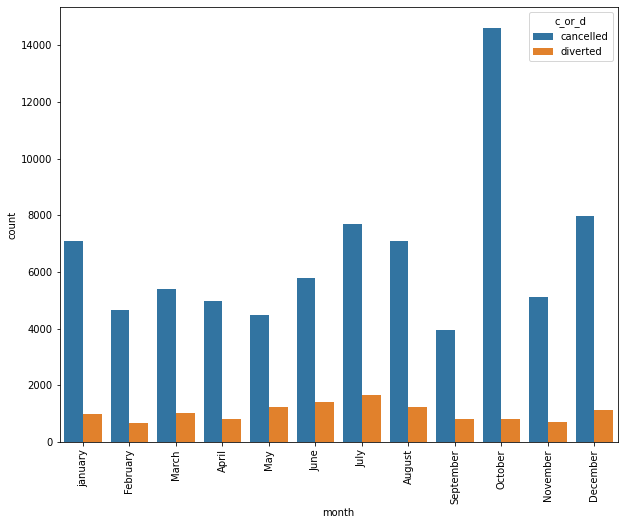

In [46]:
#plot a clustered bar char to compare cancelled and diverted flights each month
can_or_div('month')
plt.xticks(np.arange(12),('january','February','March','April','May','June','July','August','September','October','November','December'),rotation=90);

> October is highest of all months when ranked by cancelled Flights. We can say that there may be high probability of cancellation on tuesdays. September have very less cancelled flights compared to other months.


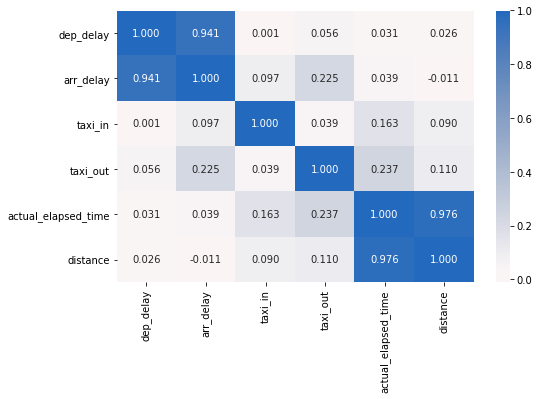

In [47]:
# plot a heat map to see the correlation between some variables.
num=['dep_delay','arr_delay','taxi_in','taxi_out','actual_elapsed_time','distance']
plt.figure(figsize = [8, 5])
sb.heatmap(df[num].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.xticks(rotation=90);
plt.yticks(rotation=0);

There is negligible or no correlation between most of the variables. 
distance and actual elapsed times are highly correlated with each other.arrival delay and departure delay are also highly correlated with each other.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


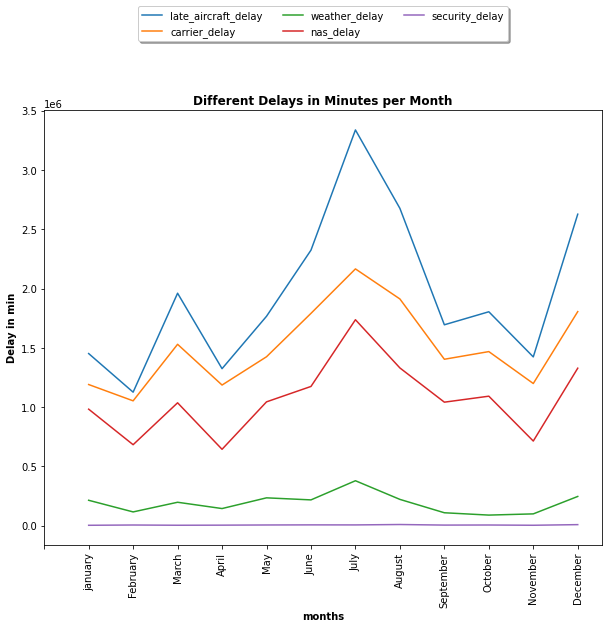

In [48]:
# filter some columns from our dataset and plot line charts for different types of delays across months
df2 = df.filter(['month','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'], axis=1)
df2 = df2.groupby('month')['late_aircraft_delay','carrier_delay','weather_delay','nas_delay','security_delay'].sum().plot(figsize=(10,8))
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True);
plt.xlabel("months",fontweight="bold")
plt.ylabel("Delay in min",fontweight="bold")
plt.title("Different Delays in Minutes per Month",fontweight="bold");
plt.xticks(np.arange(13),('','january','February','March','April','May','June','July','August','September','October','November','December'),rotation=90);

> All the Average Delays are high in the month of July. It is may be because the no. of flights operating in the month of __July__ is high compared to other months.

>  The delay due to Security is negligible. The average delay due to late aircraft is very high compared to other types of delays.
 
 

> __Late Aircraft Delay > Carrier Delay > NAS Delay > Weather Delay  > Security Delay__

> __February,April and November__ may be the best months in 2012 to travel.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


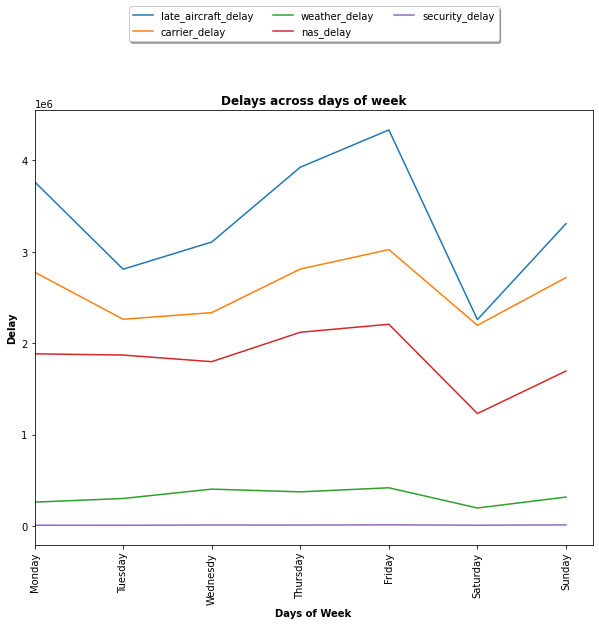

In [49]:
# filter some columns from our dataset and plot line charts for different types of delays across days of week.
df2 = df.filter(['day_of_week','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'], axis=1)
df2 = df2.groupby('day_of_week')['late_aircraft_delay','carrier_delay','weather_delay','nas_delay','security_delay'].sum().plot(figsize=(10,8))
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True);
plt.xlabel("Days of Week",fontweight="bold");
plt.ylabel("Delay",fontweight="bold")
plt.title("Delays across days of week",fontweight="bold")
plt.xticks(np.arange(8),("",'Monday','Tuesday','Wednesdy','Thursday','Friday','Saturday','Sunday'),rotation=90);
plt.xlim(left=1);

> All the Average Delays are high on __Friday and Monday__ . It is may be because the no. of flights operating on these days is high.

>  The delay due to __Security__ is negligible. The average delay due to late aircraft is very high compared to other types of delays.
 
 

> __Late Aircraft Delay > Carrier Delay > NAS Delay > Weather Delay  > Security Delay__

> As the no. of flights operating is less on saturdays. There are less chances for more delay compared to other days. Therefore __Saturday__ is best day to travel among the weekdays.

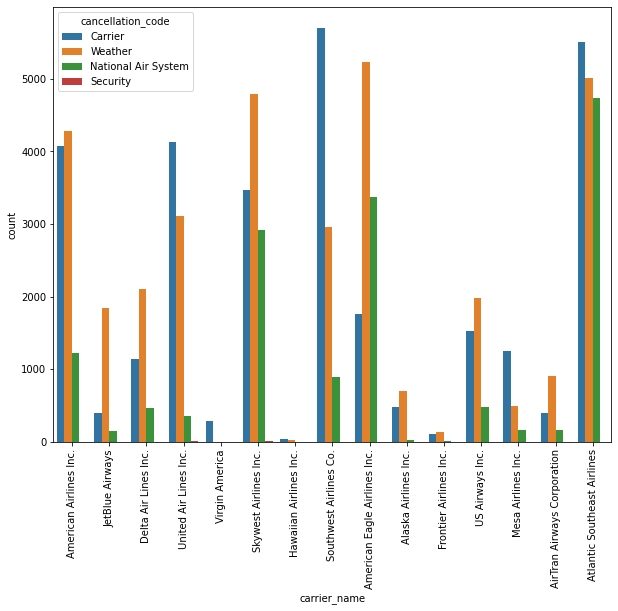

In [50]:
#plot a clustered charts representing no. of flights cancelled due to each reason across each carrier
plt.figure(figsize=(10,8))
sb.countplot(data=dfcd,x='carrier_name',hue='cancellation_code')
plt.xticks(rotation=90);

> Flights of SouthWest Airlines are mostly got cancelled due to the  bad weather.
> Very less flights are cancelled in Hawaiin Airlines Inc. , Virgin America and Frontier Airlines Inc.
> In every airline less flights are cancelled due to the National Air System(NAS).

In [51]:
#count the no. of flight record of each carrier
ca=df.carrier_name.value_counts()
df.groupby('carrier_name').carrier_delay.mean()

carrier_name
AirTran Airways Corporation     11.118802
Alaska Airlines Inc.            16.738959
American Airlines Inc.          19.502196
American Eagle Airlines Inc.    19.212559
Atlantic Southeast Airlines     22.308218
Delta Air Lines Inc.            21.166746
Frontier Airlines Inc.          12.738385
Hawaiian Airlines Inc.          33.043768
JetBlue Airways                 20.864917
Mesa Airlines Inc.              17.467791
Skywest Airlines Inc.           13.442720
Southwest Airlines Co.          14.364177
US Airways Inc.                 15.269817
United Air Lines Inc.           18.978733
Virgin America                  10.016326
Name: carrier_delay, dtype: float64

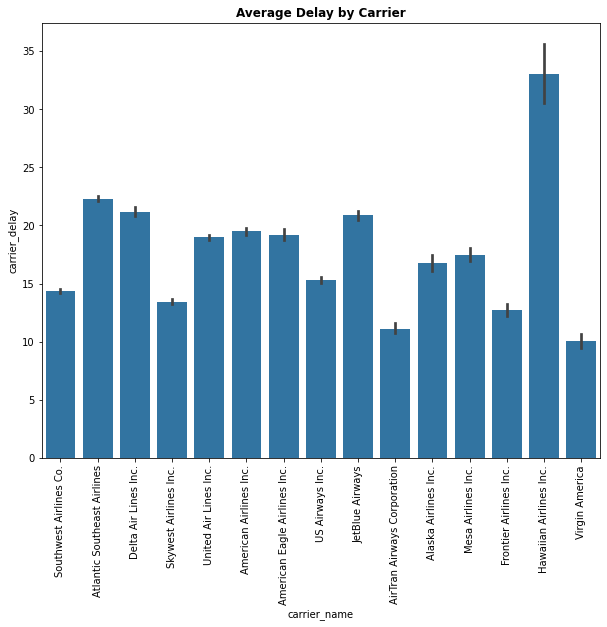

In [52]:
#plot a bar chart of average carrier delays of all the carriers present ranked by no. of flights operated.
base_color=sb.color_palette()[0]
plt.figure(figsize=(10,8))
sb.barplot(data=df,x='carrier_name',y='carrier_delay',color=base_color,order=ca.index);
plt.xticks(rotation=90);
plt.title("Average Delay by Carrier",fontweight="bold");

The top 5 Airlines (SouthWest Airlines,Atlantic Southeast Airlines,Delta Air Lines , Skywest Airlines and United Airlines) have mean carrier delay of around 20 min perflight. SkyWest Airlines done an amazing job with 13.4 min mean carrier delay per flight.

Its really good to find that as we move from left to right across the bar chat the airlines with less no. of flights also done a good work. Virgin Airlines being in the last position have least mean carrier delay of 10 min per flight.

On the other hand, taking responsibility of a higher number of flights results in a higher chance of having an extreme waiting situation.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I found that arrival delay and departure delay are highly correlated(+ve) with each other. Distance and actual elapsed time are also highly correlated. These two relations are obvious. One of the intresting things I found is many flights got cancelled on Tuesday compared to any other day.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  Many flights of Southwest Airlines got cancelled due to Carrier they have to look into their SOPs to avoid those cancellations. Cancellation due to security is very negligible. 

## Multivariate Exploration

> Lets deep dive in to average arr_delay and average dep_delay with carriers present in our dataset.

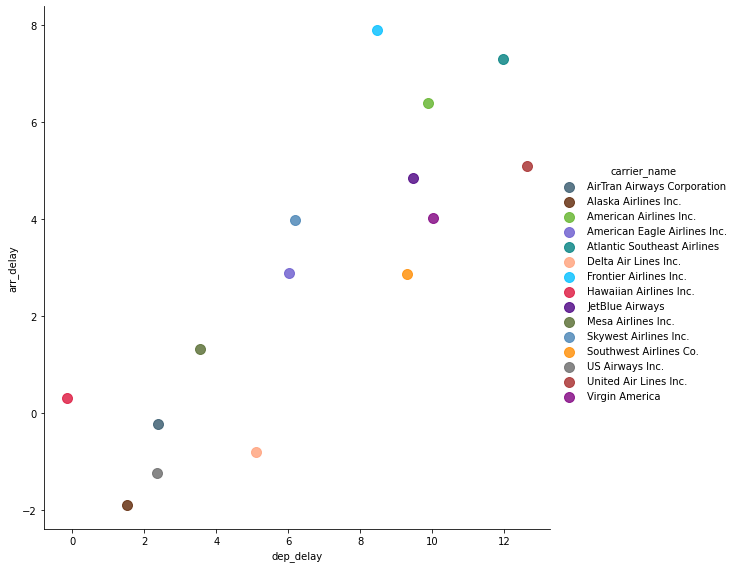

In [53]:
#make a scatter plot of average arrival delay and departure delay of all carriers encoded as color.
colors=['#35586C','#5E2605','#61B329','#6959CD','#008080','#FFA07A','#00BFFF','#DC143C','#4B0082','#556B2F','#4682B4','#FF8C00','#696969','#A52A2A','#800080']
sb.set_palette(sb.color_palette(colors))
carrier_averages = df.groupby('carrier_name').agg({'dep_delay':'mean', 'arr_delay':'mean'}).reset_index()
sb.lmplot('dep_delay', 'arr_delay', data=carrier_averages,
           fit_reg=False, hue='carrier_name',height=8,aspect=1,scatter_kws={"s": 100});

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The Average Arrival delay is Less or equal to Average Departure delay of any carrier.The Average **Arrival Delay** is least for **Alaska Airlines Inc.** and highest for  **Frontier Airlines Inc.**
The Average **Departure Delay** is least for **Hawaiian Airlines Inc.** and highest for **United Airlines Inc.**

### Were there any interesting or surprising interactions between features?

> Alaska Airlines have Arrival Delay around __-2__ which signifies that many of its flights may have reached early than the actual arrival time.